# Writing Videos
While building applications that involve video streams, it is often required to write videos. For example, in a surveillance application, you might want to save a video clip as soon as you see something unusual happening. Writing videos can also be useful during the development phase to help debug your code or to create demos of your work.

In this notebook, we will describe how to save a video in avi and mp4 formats using openCV. We will also demonstrate how to annotate video frames.

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
#%pip install moviepy
#%pip install ipython

In [33]:
# Install moviepy from your terminal or powershell.
# pip install moviepy 
from moviepy.editor import *

input_video = '../module04-video-processing-and-analysis/race_car.mp4'

# loading output video 
clip = VideoFileClip(input_video)
clip.ipython_display(width = 600)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


# Read Video from Source
Before we demonstrate how to write a video, we will first need to read a video file into memory so we have a video stream to write. Reading videos requires the creation of a video capture object using the VideoCapture() class.

Function Syntax
VideoCapture object = cv2.VideoCapture(filename[, apiPreference])
The function has 1 required argument:

filename: Name of the input video file.
There is also another common usage that allows you to specifify an index to access the video stream from a camera mounted to your computer. If you computer has a web camera, then it can be acessed using an index of 0.

VideoCapture object = cv2.VideoCapture(index[, apiPreference])

In [34]:
#Create the video capture object
source = input_video  # source = 0 for webcam

video_cap = cv2.VideoCapture(source)
if (video_cap.isOpened()== False): 
  print("Error opening video stream or file")

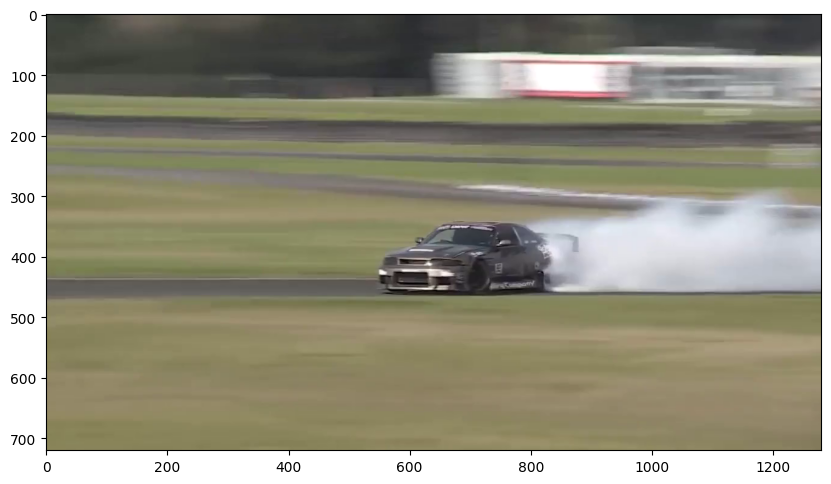

In [35]:
#Read and display the first frame of the video
ret, frame = video_cap.read()
plt.figure(figsize = (10, 8))
plt.imshow(frame[...,::-1])

# Writing Videos
Writing videos requires the creation of a video writer object using the VideoWriter() class.
Writing videos requires the creation of a video writer object using the VideoWriter() class.

Function Syntax
VideoWriter object = cv2.VideoWriter(filename, fourcc, fps, frameSize[, isColor])
The function has 4 required arguments:

filename: Name of the output video file.
fourcc: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
fps: Framerate of the created video stream.
frameSize: Size of the video frames.

In [36]:
#Create the video writer object
# Retrieve video frame properties.
frame_w   = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h   = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# Specify the value for fourcc
fourcc_avi = cv2.VideoWriter_fourcc('M','J','P','G')
fourcc_mp4 = cv2.VideoWriter_fourcc(*'XVID')

# Specify the video output filenames.
file_out_avi = 'video_out.avi'
file_out_mp4 = 'video_out.mp4'

# Slow down the speed of the video.
frame_fps = int(frame_fps/3)

# Create the video writer objects.
out_avi = cv2.VideoWriter(file_out_avi, fourcc_avi, frame_fps, (frame_w,frame_h))
out_mp4 = cv2.VideoWriter(file_out_mp4, fourcc_mp4, frame_fps, (frame_w,frame_h))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


## Loop over video frames and write each one to the output file
### Convenience function for annotating video frames

In [37]:
def drawBannerText(frame, text, banner_height_percent = 0.05, text_color = (0,255,0)):
    # Draw a black filled banner across the top of the image frame.
    # percent: set the banner height as a percentage of the frame height.
    banner_height = int(banner_height_percent * frame.shape[0])
    cv2.rectangle(frame, (0,0), (frame.shape[1],banner_height), (0,0,0), thickness=-1)

    # Draw text on banner.
    left_offset = 20
    location = (left_offset, int( 5 + (banner_height_percent * frame.shape[0])/2 ))
    fontScale = 1.5
    fontThickness = 2
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_PLAIN, fontScale, text_color, fontThickness, cv2.LINE_AA)

## Process video frames

In [ ]:
# Read all the frames in the video.
frame_count = 0
while True:
  
    # Read one frame at a time.
    ok, frame = video_cap.read()
    if not ok:
        break

    # Increment the frame count for the annotation.
    frame_count += 1
  
    # Annotate each video frame.
    drawBannerText(frame, 'Frame: ' + str(int(frame_count)) + ' FPS: ' + str(int(frame_fps)))
    
    # Write the frame to the output files.
    out_avi.write(frame)
    out_mp4.write(frame)

## Release the video capture and video writer objects

In [ ]:
# Release the VideoCapture and VideoWriter objects
video_cap.release()
out_avi.release()
out_mp4.release()

# Load the newly created video to confirm creation

In [ ]:
from moviepy.editor import *

clip = VideoFileClip(file_out_mp4)
clip.ipython_display(width = 600)